# Text classification 
## Sentiment analysis
It is a natural language processing problem where text is understood and the underlying intent is predicted. Here, you need to  predict the sentiment of movie reviews as either positive or negative in Python using the Keras deep learning library.

## Data description
The dataset is the Large Movie Review Dataset often referred to as the IMDB dataset.

The [Large Movie Review Dataset](http://ai.stanford.edu/~amaas/data/sentiment/) (often referred to as the IMDB dataset) contains 25,000 highly polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given moving review has a positive or negative sentiment.  Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).

## Loading dataset
First, we will load complete dataset and analyze some properties of it.<br>


In [1]:
import numpy as np
from matplotlib import pyplot
import numpy
import keras
from keras import regularizers,layers
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [0]:
# np.load is used inside imdb.load_data. But imdb.load_data still assumes the default 
# values of an older version of numpy. So necessary changes to np.load are made

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load Numpy
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)



In [3]:
# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print(X.shape)
print(X_train.shape)

(50000,)
(25000,)


## **Let's see some of reviews.**

In [4]:
print(X)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [5]:
word_to_id = keras.datasets.imdb.get_word_index()
id_to_word = {value:key for key,value in word_to_id.items()}
for i in range(15,20):
  print("********************************************")
  print(' '.join(id_to_word.get(id - 3, '?')for id in X_train[i] ))

********************************************
? a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh ? like character with wall to wall hot babes and mix in a ? and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily ? compound the plot was somewhere between preposterous and non existent how many ? are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become ? through ? responsibility this was written for ? males it plays like a video game i did enjoy the ? ii landing in the desert though
********************************************
? laputa castle in the sky is the bomb the message is as strong as his newer works and more pure fantastic and flying pirates how could it be any better the art is totally amazing and the soundtrack which is ? many times after this im not sure if this was the fi

## Summarize the data
1) Find out the number of classes in label (*y* array)? <br>
2) Find out number of unique words in dataset *X*?  <br>
3) Calculate the list of review length , report mean and standard deviation. <br>

In [6]:
def summarize_data():
  """
  Output:
                    classes: list, list of unique classes in y  
                no_of_words: int, number of unique words in dataset x 
     list_of_review_lengths: list,  list of lengths of each review 
         mean_review_length: float, mean(list_of_review_lengths), a single floating point value
          std_review_length: float, standard_deviation(list_of_review_lengths), a single floating point value
  """
  # YOUR CODE HERE
  classes=np.unique(y)
  
  li=[]
#   print(np.unique(X[0]))
  list_of_review_lengths=[]
  for i in X:
    list_of_review_lengths+=[len(i)]
    li+=i
  no_of_words=len(np.unique(li))  
  mean_review_length=np.mean(list_of_review_lengths)
  std_review_length=np.std(list_of_review_lengths)
  vocabulary=np.unique(li)
  return classes, no_of_words, list_of_review_lengths, mean_review_length, std_review_length, vocabulary


classes, no_of_words, list_of_review_lengths, mean_review_length, std_review_length, vocabulary = summarize_data()
print(summarize_data())

(array([0, 1]), 9998, [218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 

In [7]:
'''test for summarize_data'''
def test_summarize_data():
  assert classes.tolist() == [0,1]
  assert no_of_words == 9998
  assert np.isclose(mean_review_length, 234.75892, atol = 0.001)
  assert np.isclose(std_review_length, 172.91149458735703, atol = 0.001)
  print('Test passed', '\U0001F44D')
test_summarize_data()

Test passed 👍


In [8]:
type(y_train)

numpy.ndarray

In [9]:
print(y_train)

[1 0 0 ... 0 1 0]


## One hot encode the output data

In [0]:
def one_hot(y):
  """
  Inputs:
    y: numpy array with class labels
  Outputs:
    y_oh: numpy array with corresponding one-hot encodings
  """
  # YOUR CODE HERE
  oh=np.eye(len(np.unique(y)))
  y_oh=[]
  for i in y:
    y_oh+=[oh[i]]
  y_oh=np.array(y_oh)
  return y_oh
y_train = one_hot(y_train)
y_test = one_hot(y_test)

In [11]:
print(y_train)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


### Multi-hot encode the input data

All sequences are of different length and our vocabulory size is 10K.  <br>
**To Do**<br>
1) Intialize vector of dimension 10,000 with value 0. <br>
2) For those tokens in a sequence which are present in Vocabulary make that position as 1 and keep all other positions filled with 0. <br>
For example, lets take Vocabulary = ['I': 0, ':1, 'eat: 2:' mango: 3, 'fruit':4, 'happy':5, 'you':6] <br>
We have two sequnces and 
Multi-hot encoding of both sequences will be of dimension:  7 (vocab size).<br>
1) *Mango is my favourite fruit* becomes *Mango ? ? ? fruit* after removing words which are not in my vocabulary. Hence multi hot encoding will have two 1's corresponding to mango and fruit i.e, [0, 0, 0, 1, 1, 0, 0] <br>
Similarly, <br>
  2) *I love to eat mango*  = *I ? ? eat mango*  =  [1, 1, 0, 1, 0, 0, 0]

In [0]:
def multi_hot_encode(sequences, dimension):
  """
    Input:
          sequences: list of sequences in X_train or X_test

    Output:
          results: mult numpy matrix of shape(len(sequences), dimension)
                  
  """
  # YOUR CODE HERE
  results=[]
  for i in sequences:
    temp=np.zeros(dimension)
    for j in i:
      if(j in vocabulary):
        temp[j]=1
#     results+=[temp]
#   temp=np.zeros(dimension)
#   for i in sequences[1]:
#     if(i in vocabulary):
#       temp[i]=1
    results+=[temp]
  return np.array(results)


In [13]:
x_train = multi_hot_encode(X_train, 10000)
x_test = multi_hot_encode(X_test, 10000)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [14]:
'''test for pad_sequences'''
def test_multi_hot_encode():
  assert np.sum(x_train[1]) == 121.0
  print('Test passed', '\U0001F44D')
test_multi_hot_encode()

Test passed 👍


## Split the data into train and validation

In [0]:
from sklearn.model_selection import train_test_split
x_strat, x_dev, y_strat, y_dev = train_test_split(x_train, y_train,test_size=0.40,random_state=0, stratify=y_train)

## Build Model
Build a multi layered feed forward network in keras. 

### Create the model

In [100]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras import optimizers
def create_model():
    """
    Output:
        model: A compiled keras model
    """
    # YOUR CODE HERE
    input_layer=Input(shape=(10000,))
    hidden_layer=Dense(5, activation="relu")(input_layer)
    output_layer=Dense(2, activation="softmax")(hidden_layer)
    model=Model(inputs=[input_layer],outputs=[output_layer])
    model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
    model.summary()
    return model
  
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 50005     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 12        
Total params: 50,017
Trainable params: 50,017
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 50005     
_________________________________________________________________
dense_

### Fit the Model

In [101]:
import matplotlib.pyplot as plt
def fit(model):
    """
    Action:
        Fit the model created above using training data as x_strat and y_strat
        and validation_data as x_dev and y_dev, verbose=2 and store it in 'history' variable.
        
        evaluate the model using x_test, y_test, verbose=0 and store it in 'scores' list
    Output:
        scores: list of length 2
        history_dict: output of history.history where history is output of model.fit()
    """
    # YOUR CODE HERE
    history = model.fit(x_strat,y_strat,epochs=3,verbose=2,validation_data=(x_dev,y_dev))
    scores=model.evaluate(x_test,y_test,verbose=0)
    history_dict=history.history
    return scores,history_dict
    
scores,history_dict = fit(model)    


Train on 15000 samples, validate on 10000 samples
Epoch 1/3
 - 4s - loss: 0.3620 - acc: 0.8547 - val_loss: 0.2861 - val_acc: 0.8837
Epoch 2/3
 - 4s - loss: 0.1806 - acc: 0.9360 - val_loss: 0.2945 - val_acc: 0.8820
Epoch 3/3
 - 4s - loss: 0.1175 - acc: 0.9608 - val_loss: 0.3326 - val_acc: 0.8772


In [102]:
Accuracy=scores[1]*100
print('Accuracy of your model is')
print(scores[1]*100)

Accuracy of your model is
87.2


In [103]:
history_dict['loss']

[0.36196787486076354, 0.18061589948336285, 0.11749628930886587]

### Verify whether training in converged or not

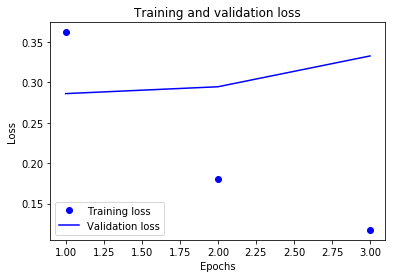

In [104]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

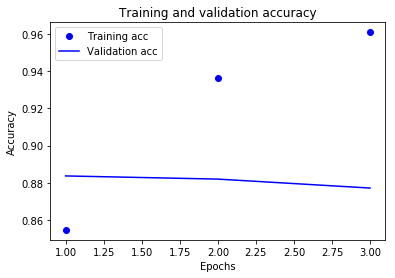

In [105]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Advanced
1. Find some reviews where your model fails to predict the sentiment correctly and give the reason why.
2. Write 5 reviews on your own with at least 20 words. See if your model correctly predicts the sentiment on these reviews


In [106]:
print(y_test)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [107]:
print(model.predict(x_test))

[[7.5300747e-01 2.4699254e-01]
 [8.8735273e-05 9.9991131e-01]
 [6.5676403e-01 3.4323591e-01]
 ...
 [9.1233653e-01 8.7663397e-02]
 [9.4325477e-01 5.6745186e-02]
 [1.0971614e-01 8.9028388e-01]]


In [0]:
y_test_pred=(np.argmax(model.predict(x_test),axis=1))

In [109]:
print(y_test_pred)

[0 1 0 ... 0 0 1]


In [110]:
print(y_test.shape,y_test_pred.shape)

(25000, 2) (25000,)


In [0]:
y_test_noh=np.argmax(y_test,axis=1)

In [112]:
print(y_test_noh)

[0 1 1 ... 0 0 0]


As we can see at index 2 and at index -1, the y_test_pred value doesnt match the one in y_test

In [113]:
print(X_test[-1])

[1, 6, 52, 7465, 430, 22, 9, 220, 2594, 8, 28, 2, 519, 3227, 6, 769, 15, 47, 6, 3482, 4067, 8, 114, 5, 33, 222, 31, 55, 184, 704, 5586, 2, 19, 346, 3153, 5, 6, 364, 350, 4, 184, 5586, 9, 133, 1810, 11, 5417, 2, 21, 4, 7298, 2, 570, 50, 2005, 2643, 9, 6, 1249, 17, 6, 2, 2, 21, 17, 6, 1211, 232, 1138, 2249, 29, 266, 56, 96, 346, 194, 308, 9, 194, 21, 29, 218, 1078, 19, 4, 78, 173, 7, 27, 2, 5698, 3406, 718, 2, 9, 6, 6907, 17, 210, 5, 3281, 5677, 47, 77, 395, 14, 172, 173, 18, 2740, 2931, 4517, 82, 127, 27, 173, 11, 6, 392, 217, 21, 50, 9, 57, 65, 12, 2, 53, 40, 35, 390, 7, 11, 4, 3567, 7, 4, 314, 74, 6, 792, 22, 2, 19, 714, 727, 5205, 382, 4, 91, 6533, 439, 19, 14, 20, 9, 1441, 5805, 1118, 4, 756, 25, 124, 4, 31, 12, 16, 93, 804, 34, 2005, 2643]


In [114]:
print(' '.join(id_to_word.get(id - 3, '?')for id in X_test[-1] ))

? a good ol' boy film is almost required to have ? car chases a storyline that has a vague resemblance to plot and at least one very pretty country gal ? with short shorts and a low top the pretty gal is here dressed in designer ? but the redneck ? stop there jimmy dean is a natural as a ? ? but as a tough guy former sheriff he comes up way short big john is big but he isn't convincing with the bad part of his ? bug eyed jack ? is a hoot as always and bo hopkins has been playing this same part for decades ned beatty also does his part in a small role but there is no story it ? more like an episode of in the heat of the night than a feature film ? with easily predictable sentiment perhaps the most glaring problem with this movie is charlie daniels singing the theme you know the one it was made famous by jimmy dean


In [115]:
print(X_test[2])

[1, 111, 748, 4368, 1133, 2, 2, 4, 87, 1551, 1262, 7, 31, 318, 9459, 7, 4, 498, 5076, 748, 63, 29, 5161, 220, 686, 2, 5, 17, 12, 575, 220, 2507, 17, 6, 185, 132, 2, 16, 53, 928, 11, 2, 74, 4, 438, 21, 27, 2, 589, 8, 22, 107, 2, 2, 997, 1638, 8, 35, 2076, 9019, 11, 22, 231, 54, 29, 1706, 29, 100, 2, 2425, 34, 2, 8738, 2, 5, 2, 98, 31, 2122, 33, 6, 58, 14, 3808, 1638, 8, 4, 365, 7, 2789, 3761, 356, 346, 4, 2, 1060, 63, 29, 93, 11, 5421, 11, 2, 33, 6, 58, 54, 1270, 431, 748, 7, 32, 2580, 16, 11, 94, 2, 10, 10, 4, 993, 2, 7, 4, 1766, 2634, 2164, 2, 8, 847, 8, 1450, 121, 31, 7, 27, 86, 2663, 2, 16, 6, 465, 993, 2006, 2, 573, 17, 2, 42, 4, 2, 37, 473, 6, 711, 6, 8869, 7, 328, 212, 70, 30, 258, 11, 220, 32, 7, 108, 21, 133, 12, 9, 55, 465, 849, 3711, 53, 33, 2071, 1969, 37, 70, 1144, 4, 5940, 1409, 74, 476, 37, 62, 91, 1329, 169, 4, 1330, 2, 146, 655, 2212, 5, 258, 12, 184, 2, 546, 5, 849, 2, 7, 4, 22, 1436, 18, 631, 1386, 797, 7, 4, 8712, 71, 348, 425, 4320, 1061, 19, 2, 5, 2, 11, 661, 8, 33

In [116]:
print(' '.join(id_to_word.get(id - 3, '?')for id in X_test[2] ))

? many animation buffs consider ? ? the great forgotten genius of one special branch of the art puppet animation which he invented almost single ? and as it happened almost accidentally as a young man ? was more interested in ? than the cinema but his ? attempt to film two ? ? fighting led to an unexpected breakthrough in film making when he realized he could ? movement by ? beetle ? and ? them one frame at a time this discovery led to the production of amazingly elaborate classic short the ? revenge which he made in russia in ? at a time when motion picture animation of all sorts was in its ? br br the political ? of the russian revolution caused ? to move to paris where one of his first productions ? was a dark political satire ? known as ? or the ? who wanted a king a strain of black comedy can be found in almost all of films but here it is very dark indeed aimed more at grown ups who can appreciate the satirical aspects than children who would most likely find the climax ? i'm midd

In [0]:
li1=["Molly (Tessa Thompson) encounters the MIB as a young girl and becomes obsessed with finding the secret organisation. She’s written off as crazy for believing in aliens, but her persistence leads her to the doorstep of the US headquarters. Impressed by her tenacity, department head Agent O (Emma Thompson) gives Molly a chance to prove herself, dubbing her Agent M, and putting her on probation. M is packed off to London, where she meets the heroic Agent H, who saved the world along with the London head High T (Liam Neeson) using only their wits. Agents H & M are assigned a seemingly low-key mission, but everything goes haywire, leaving the fate of the planet in their hands. While this plot sounds pretty much like every other MIB film so far, this continuation of the franchise appeared to be a lot more promising with the charismatic and currently popular Chris Hemsworth, paired with the equally affable Tessa Thompson. The actors have previously worked together with impressive results. Director F. Gary Gray aims to capture their lightning chemistry in this film but instead ends up proving that no amount of charisma can substitute a strong screenplay. 'MIB International' meanders along the way to set up the plot, and all the wisecracks (few of which land), special effects (nothing that we haven’t seen already), or fancy aliens (same as before) can’t seem to salvage it. All isn’t lost; the one character who stands out is Pawny, voiced by Kumail Nanjiani. His thumb sized alien somehow gets the best lines, and therefore, the best laughs. Should there be a sequel, his backstory might be worth looking into. Other than that, there’s not much to savour here. The villains are bland, and although some of them have pretty cool powers, their motivations are as derivative as their personalities. There is intrigue around the relationship between Riza (Rebecca Ferguson) and Agent H, but it is barely explored. An obligatory twist towards the climax has a storytelling element that holds promise. Sadly, it comes a little too late in the proceedings. Despite all its shortcomings, Chris Hemsworth and Tessa Thompson fans may be able to sit this through, simply because their screen presence is so magnetic and charming. Pity they’re working with such a bland script, ending in a film that seems to cater to new audiences, rather than those who grew up watching the edgier MIB movies before it."]

In [0]:
li2=["Meet Kabir Singh – the kind of boyfriend, who is aggressive, obsessive and would go to any extreme for his girl. He is all in, or nothing at all. As a senior and a topper in one of Delhi’s most reputed medical institutes, he wields immense power. Thanks to his lethal anger issues, there are few who would want to mess with him. By his own admission, he becomes a rebel with a cause as soon as he sees his junior in college Preeti (Kiara Advani). For him, it is love at first sight. But this is far from a meet cute romance, with mush gush and the regular romantic toppings. It immediately gives Kabir’s unsettled and self-destructive streak a reason to manifest. Thus, begins the real journey of his character into the deep dark abyss of chasing the love of his life. Shahid’s performance lets the character get away with a lot of vices like womanizing, drug addiction, alcoholism and brash male toxicity. For some, his actions and recklessness might seem problematic, but that is evidently his character sketch, and Shahid plays it with brutal honesty. Shahid Kapoor completely surrenders himself to the extremism of Kabir Singh. The powerhouse performer plays each and every shade of Kabir with such passion and perfection that his conviction makes you root for him, even when he is far stretched from being the picture perfect lover boy. It is only because of Shahid’s strong performance that many of his characters’ excesses seem justified. In terms of screen space, no one comes close to the leading man, not even the woman he is so obsessively in love with, Kirara Advani. For most part, Kiara remains demure and is left to use silence as her only tool for performance. With such limited scope, she never really gets a chance to shine. Shahid’s trusted friend Shiva (Soham Majumadar), on the other hand, gets ample opportunity to show solid support even when his friend is way out of line. The film’s conflicts in the second half start becoming repetitive. The pace of the film becomes an issue with a runtime that is undeniably long. Thankfully, the realism and build up to Kabir’s deterioration is well executed and so is the practical support that he gets from his family. Writer-director Sandeep Vanga Reddy, who also helmed the Telugu original, makes his hero vulnerable but not weak enough to feel sorry for. The remake stays mostly true to the original. However, the original had better chemistry between the lead actors, hence the love story seemed more effective. Also, Kabir Singh is a tad more humane than Arjun Reddy while being equally intense. He always shows up looking dapper, even in the most dire conditions. So it isn’t a surprise that the most pretty girls, including a heroine Jia (Nikita Dutta), falls for his unabashed charm. Film’s music compliments the narrative with its soulful renditions in the background. While Kabir Singh is a welcome change from stereotypical love stories, this kind of love affair needs some getting used to. If you can generally accept the fact that human beings can be flawed (sometimes deeply flawed), you will be able to stomach this rebellious story of love with extreme madness, often lacking rationale and reason. Through his protagonist, Sandeep bets all his cards on his leading man, making sure you either love him or hate him, but you can’t ignore him."]

In [0]:
li3=[" An official adaptation of South Korean drama Ode to my Father (2014), Bharat focuses on the personal and professional choices of its righteous hero, set against the social backdrop of its time.  Separated from his father and sister during the Indo-Pak partition in 1947 as a child, Bharat decides to dedicate his entire life to keeping the promise he’d made to his missing father. He takes it upon himself as the eldest son of the house to look after his mother and siblings, hoping their family would reunite some day. From 1947 to 2010, the narrative traverses a period of over six decades. You see Bharat jumping risky odd jobs to make ends meet.  He even falls in love with the feisty Kumud (Katrina Kaif), who is brave and honest enough to make the first move on him. “I love you. Shaadi ki umra ho gayi hai meri. Tumse shaadi karna chahti hoon,” she says without batting an eye. She proposes marriage without fearing rejection. “I do and say what I think is right,” she adds and doesn’t mind teasing Salman, “Tum thodey self-obsessed nahi ho?” She was impressive even in Zero and Bharat is Katrina’s best acting part till date. Her chemistry with Salman feels natural and she does a good job at portraying a woman who is self assured without being cocky. She is equal, even superior to her man and Ali Abbas Zafar makes no bones about it. Her hair is a different story though. The grey streaks are inconsistent as her character ages and the unruly curls feel unnecessary. What also stands out in Ali’s writing is how he places Sunil Grover’s character as Vilayati, Bharat’s best friend and confidante. Our best friends are our soulmates, constant companions and it reflects here beautifully. Grover does compete justice to his well-written role and deserves more such significant parts. Sonali Kulkarni and Jackie Shroff are terrific as always. Interestingly, there’s a hidden Sooraj Barjatya in Salman Khan, somewhere. In times of the ‘hookup culture’ being glorified in movies and web shows, his films with old school values often aim to get the families together and that stands out. He acts well and looks good. Salman’s extreme closeness to his real family (parents and siblings), makes him ideal to play Bharat as he embodies his character’s traits, thus making it more convincing. Ali on the contrary, plays a balancing act. He infuses emotions with ample fun Salman elements that will get his diehard fans to whistle. He mounts the meandering story in an unhurried manner on a huge canvas. While he manages to keep you hooked despite his complex source material and misplaced songs, Bharat has too many things happening at once and too many time leaps. This eventually makes the movie an exhausting, scattered watch despite the entertainment, humour and nobility it propagates. Also, the ‘intention to inspire’ is a bit in your face. While emotional manipulation happens in every film, the fact that it’s evident here makes it a tad overbearing. The reverence is blatant. A little subtlety and crisp editing would have done wonders. Bharat is well-intentioned, entertaining and doesn’t succumb to the trappings of commercial potboilers. The fact that it tries a bit too hard to prove that, is its problem. "]

In [0]:
li4=["Hollywood has a distinct ability to breathe life into objects and the Toy Story franchise is perhaps the best example. This time, writers Andrew Stanton and Stephany Folsom introduce some new characters in this emotional roller coaster. While we still have the good ol’ Woody holding the center stage, the focus is now on Forky. As the name suggests, it’s just a fork with strings for hands and broken wooden sticks for toes. But the fact that you feel instantly connected with him and root for him symbolises the brilliance of the film’s nuanced writing and near flawless execution. Tony Hale’s perfectly pitched voice and an endearing character arc gives him the edge. Director Josh Cooley promptly pulls Toy Story 4 into the action mode as the motley group of toys are taken on a road trip. The fun adventure begins right from the start, as we see Woody inadvertently getting in trouble for always doing the right thing. And Tom Hanks’ reassuring voice is so well suited to Woody that he never feels like a toy. Of course, the other superstar toys from the Toy Story hall of fame continue to shine here too. Among them, Buzz Lightyear (Tim Allen) and Bo Peep (Annie Potts) get a lot more to play with, compared to the rest of the gang. Watch out for Bo’s character transition from a porcelain skinned beauty to a street-smart survivor. Buzz on the other hand, continues to charm as a supportive friend, who is always ready to take one for the team. While the other characters (like Potato Heads, Jessie, Bullseye, Hamm and Rex) are mostly relegated to the background, many laugh out loud moments come from the adorable newcomers Ducky (Keegan-Michael Key) and Bunny (Jordan Peele). More newcomers like the Canadian biker stuntman Duke Caboom (Keanu Reeves) and the doll named Gabby Gabby {Christina Hendricks) add a whole new twist to the tale. While Gabby’s character develops in an intriguing manner, Caboom adds to the action adventure despite an equally poignant past. But the hero of the film is clearly Woody, who always plays it right and tugs at your heartstrings. What really makes Toy Story 4 special is its strong emotional fabric woven into a riveting narrative. Dialogues are laced with high emotional impact and are delivered effectively in familiar voices. This brilliantly captures the film’s core mission to humanise the bond between a child and a toy. Overall, this instalment of Toy Story succeeds in achieving a lot more than just laughs. It manages to strike a universal chord with its audience, by posing deep and meaningful questions like the purpose of our existence. And it does all of this in a wholesome entertaining way with enough comedy and action to make it a fun ride for children of all ages.Even in its fourth instalment, Toy Story not only remains highly relevant, but also elevates the franchise to newer highs of cinematic excellence."]

In [0]:
li5=["2016’s animated flick ‘The Secret Life of Pets’, set in New York, was the cute inside story of what pets were up to back home when their owners headed out to work. We met Max and saw through his adjustment trials of living with his new companion in the house, the very big and fluffy Duke (Eric Stonestreet). In the second instalment, there is a new dynamic thrown into the mix as Max’s owner Katie (Elle Kemper) falls in love, gets married and has a baby – all in quick succession. And now there is baby Liam in the house – whom Max (Patton Oswalt) is at first jealous of and then soon enough, extremely protective of. Bordering on being anxious and fearful all the time of all the unknown dangers that could come the baby’s way. But when the family takes off for a short holiday to a farm, Max is confronted with the wise Sheep dog called Rooster (Harrison Ford) and he finally gets a few life lessons. At the same time, there’s a lot happening in two parallel tracks back in the city – Max leaves his favourite toy, Busy Bee under the care of Gidget, the pomerarian (Jenny Slate) who manages to lose it to a house filled with nasty looking felines. And meanwhile, Snowball, the bunny (Kevin Hart) – channelizes his inner superhero and gets inadvertently pulled into a rescue mission of a tiger cub from a cruel circus owner.While for most of the film, the three tracks run independent of each other they tie up at the end. However, not before the narrative is left feeling oddly confusing at times. But there are enough moments of furry cuteness, laughs and energetic pieces and gags bundled in to make it an entertaining watch, especially for kids. Characters like Chloe the cat (Lake Bell), whose snooty and wry humour is a hoot and the Daisy, the Shih Tzu (Tiffany Haddish), whose fearlessness and ability to think on her feet is admirable – stay with you. As does Harrison Ford’s intense voice as Rooster and the climax, which is designed like an action movie piece. Overall, ‘The Secret Life of Pets 2’ is an easy breezy watch that fits right into the summer vacation mood. And is perfect for a kid’s movie day out!"]

In [0]:
li1=[li1[0].split()]
li2=[li2[0].split()]
li3=[li3[0].split()]
li4=[li4[0].split()]
li5=[li5[0].split()]


In [123]:
print(li1)
print(li2)
print(li3)
print(li4)
print(li5)


[['Molly', '(Tessa', 'Thompson)', 'encounters', 'the', 'MIB', 'as', 'a', 'young', 'girl', 'and', 'becomes', 'obsessed', 'with', 'finding', 'the', 'secret', 'organisation.', 'She’s', 'written', 'off', 'as', 'crazy', 'for', 'believing', 'in', 'aliens,', 'but', 'her', 'persistence', 'leads', 'her', 'to', 'the', 'doorstep', 'of', 'the', 'US', 'headquarters.', 'Impressed', 'by', 'her', 'tenacity,', 'department', 'head', 'Agent', 'O', '(Emma', 'Thompson)', 'gives', 'Molly', 'a', 'chance', 'to', 'prove', 'herself,', 'dubbing', 'her', 'Agent', 'M,', 'and', 'putting', 'her', 'on', 'probation.', 'M', 'is', 'packed', 'off', 'to', 'London,', 'where', 'she', 'meets', 'the', 'heroic', 'Agent', 'H,', 'who', 'saved', 'the', 'world', 'along', 'with', 'the', 'London', 'head', 'High', 'T', '(Liam', 'Neeson)', 'using', 'only', 'their', 'wits.', 'Agents', 'H', '&', 'M', 'are', 'assigned', 'a', 'seemingly', 'low-key', 'mission,', 'but', 'everything', 'goes', 'haywire,', 'leaving', 'the', 'fate', 'of', 'the'

In [124]:
print(type(word_to_id))

<class 'dict'>


In [0]:
li0=[li1[0],li2[0],li3[0],li4[0],li5[0]]
li0_ind=[]
for i in li0:
  temp=[]
  for j in i:
    try:
      temp+=[word_to_id[j]]
    except:continue
  li0_ind+=[temp]
  

In [126]:
print(li0_ind[4])

[1122, 506, 4, 267, 8, 13, 1, 1033, 1001, 62, 4, 48, 9324, 68, 53, 5, 142, 341, 51, 65, 6126, 2851, 43, 5, 1833, 2, 216, 140, 24, 20766, 5959, 4, 578, 16, 24, 159, 4233, 8, 1, 1, 52, 191, 2, 10380, 1, 330, 47, 6, 3, 159, 3918, 1373, 80, 1, 1490, 14, 2053, 731, 8, 211, 1018, 2, 44, 3, 893, 5047, 29, 8, 1602, 147, 47, 6, 893, 8, 1, 310, 5047, 934, 6, 30, 83, 3680, 4, 2, 92, 512, 573, 7712, 20, 109, 7064, 2, 12458, 29, 1, 55, 4, 29, 1, 1856, 8942, 12, 97, 213, 1, 51, 1, 220, 301, 122, 15, 3, 343, 3179, 5, 3, 6, 6301, 16, 1, 1564, 909, 443, 2, 26, 414, 211, 3, 168, 110, 1, 169, 35733, 3, 173, 1445, 8, 104, 4677, 4131, 142, 8, 1, 540, 5047, 886, 24, 1637, 464, 1, 456, 4, 1, 34, 1027, 5, 1582, 9, 5, 3, 310, 1058, 16, 1603, 264, 1, 5546, 5047, 24, 2416, 3780, 2, 211, 7637, 1903, 80, 3, 2229, 1970, 4, 3, 4911, 18101, 36, 3, 2744, 5598, 15, 88, 4, 1, 1, 286, 4131, 518, 1721, 4, 254, 82, 33, 4225, 53, 30, 1, 21, 156, 1, 1318, 6, 314, 544, 2987, 1496, 30, 47, 23, 192, 385, 4, 10261, 916, 2, 6346,

In [127]:
li0_mh=multi_hot_encode(li0_ind,10000)
print(np.argmax(model.predict(li0_mh),axis=1))

[1 1 0 1 0]
